# projection algorithms
___

### 2D blur problem

In [1]:
import numpy as np
import numpy.linalg as la
import scipy.sparse as sps
import scipy.sparse.linalg as spsla

import sys
sys.path.append('../..')

import util, optimize, time
import matplotlib.pyplot as plt

import template
import projection
import tomo2D.drt as drt
from tomo2D import blur_2d as blur_2d
from tomo1D import blur_1d as blur_1d

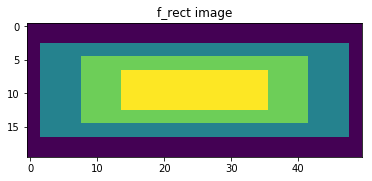

Generating blur problem w/ params:
m: 1000    k/p: 50   sig: 3.00   t: 10

Kb shape: (1000, 1000)
 X shape: (1000, 1000)
 M shape: (50, 1000)
sx shape: (1000, 1)
sb shape: (1000, 1)


In [2]:
## problem parameters
n_1 = 20     # number of rows of image
n_2 = 50     # number of cols of image
n = n_1*n_2  # n = number of pixels
m = n        # number of pixels in data space (same as img space)
k = 50       # number of pixels in HO ROI

## blur parameters
sigma = 3
t = 10

## create 2d image and flatten to create img signal
f = blur_2d.gen_f_rect(n_1=n_1, n_2=n_2, levels=3)
sx = f.flatten("F").reshape(n_1*n_2,1)

## generate problem operators
Kb, X, M = util.gen_instance_2d(m=m, n_1=n_1, n_2=n_2, k=k, sigma=sigma, t=t, \
                                sparse=True, K_diag=np.ones(m, dtype=np.float64))
B = sps.eye(n_1*n_2)

## generate blurred data signal
sb = X.dot(sx)

## printing
print('Generating blur problem w/ params:')
print('m: %d    k/p: %d   sig: %.2f   t: %d\n' % (m, k, sigma, t))
print('Kb shape: ' + str(Kb.shape))
print(' X shape: ' + str(X.shape))
print(' M shape: ' + str(M.shape))
print('sx shape: ' + str(sx.shape))
print('sb shape: ' + str(sb.shape))

In [3]:
## solver parameters
max_iter = 200
tol = 1.0
lam = 100.

## specific parameters
beta = 0.5    # RAAR
sl_raar = 2.  # RAAR step length (2. = standard)
sl_dr = 1.5   # DR step length (2. = reflection)

In [4]:
## direct solve
R_direct = template.direct_rxn(X=X, lam=lam)
w_direct, Kx, sx = template.direct_solve(Kb=Kb, R=R_direct, M=M, sb=sb)

/Users/jakeroth/anaconda/lib/python2.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


((50, 1000), 'MR')
((1000, 1000), 'Kb')


In [5]:
## generate ESI system (for MINRES)
minres_A, minres_b = template.gen_ESI_system(X=X, Kb=Kb, B=B, M=M, lam=lam, sb=sb)

## printing
print('minres_A:' + str(minres_A.shape))
print('minres_b:' + str(minres_b.shape))

minres_A:(2000, 2000)
minres_b:(2000,)


In [7]:
## solve
_, raar_mins, _, raar_times, raars = projection.raar(Kb=Kb, A=X, sb=sb, lam=lam, M=M, beta=beta, tol=tol, \
    max_iter=max_iter, full_output=1, sl=sl_raar)
_, pocs_mins, _, pocs_times, pocss = projection.pocs(Kb=Kb, A=X, sb=sb, lam=lam, M=M, tol=tol, \
    max_iter=max_iter, full_output=1)
_, _, _, _, _, dr_mins, dr_times, drs = projection.dr(Kb=Kb, A=X, sb=sb, lam=lam, M=M, tol=tol, \
    max_iter=max_iter, full_output=1, order=12, sl=sl_dr)
_, _, minres_xs, minres_resids, minres_times = spsla.minres_track(A=minres_A, b=minres_b)

=== RAAR Iter 0 =============
=== RAAR Iter 1 =============
=== RAAR Iter 2 =============
=== RAAR Iter 3 =============
=== RAAR Iter 4 =============
=== RAAR Iter 5 =============
=== RAAR Iter 6 =============
=== RAAR Iter 7 =============
=== RAAR Iter 8 =============
=== RAAR Iter 9 =============
=== RAAR Iter 10 =============
=== RAAR Iter 11 =============
=== RAAR Iter 12 =============
=== RAAR Iter 13 =============
=== RAAR Iter 14 =============
=== RAAR Iter 15 =============
=== RAAR Iter 16 =============
=== RAAR Iter 17 =============
=== RAAR Iter 18 =============
=== RAAR Iter 19 =============
=== RAAR Iter 20 =============
=== RAAR Iter 21 =============
=== RAAR Iter 22 =============
=== RAAR Iter 23 =============
=== RAAR Iter 24 =============
=== RAAR Iter 25 =============
=== RAAR Iter 26 =============
=== RAAR Iter 27 =============
=== RAAR Iter 28 =============
=== RAAR Iter 29 =============
=== RAAR Iter 30 =============
=== RAAR Iter 31 =============
=== RAAR Iter 32 =

=== POCS Iter 63 =============
=== POCS Iter 64 =============
=== POCS Iter 65 =============
=== POCS Iter 66 =============
=== POCS Iter 67 =============
=== POCS Iter 68 =============
=== POCS Iter 69 =============
=== POCS Iter 70 =============
=== POCS Iter 71 =============
=== POCS Iter 72 =============
=== POCS Iter 73 =============
=== POCS Iter 74 =============
=== POCS Iter 75 =============
=== POCS Iter 76 =============
=== POCS Iter 77 =============
=== POCS Iter 78 =============
=== POCS Iter 79 =============
=== POCS Iter 80 =============
=== POCS Iter 81 =============
=== POCS Iter 82 =============
=== POCS Iter 83 =============
=== POCS Iter 84 =============
=== POCS Iter 85 =============
=== POCS Iter 86 =============
=== POCS Iter 87 =============
=== POCS Iter 88 =============
=== POCS Iter 89 =============
=== POCS Iter 90 =============
=== POCS Iter 91 =============
=== POCS Iter 92 =============
=== POCS Iter 93 =============
=== POCS Iter 94 =============
=== POCS

=== DR Iter 133 =============
=== DR Iter 134 =============
=== DR Iter 135 =============
=== DR Iter 136 =============
=== DR Iter 137 =============
=== DR Iter 138 =============
=== DR Iter 139 =============
=== DR Iter 140 =============
=== DR Iter 141 =============
=== DR Iter 142 =============
=== DR Iter 143 =============
=== DR Iter 144 =============
=== DR Iter 145 =============
=== DR Iter 146 =============
=== DR Iter 147 =============
=== DR Iter 148 =============
=== DR Iter 149 =============
=== DR Iter 150 =============
=== DR Iter 151 =============
=== DR Iter 152 =============
=== DR Iter 153 =============
=== DR Iter 154 =============
=== DR Iter 155 =============
=== DR Iter 156 =============
=== DR Iter 157 =============
=== DR Iter 158 =============
=== DR Iter 159 =============
=== DR Iter 160 =============
=== DR Iter 161 =============
=== DR Iter 162 =============
=== DR Iter 163 =============
=== DR Iter 164 =============
=== DR Iter 165 =============
=== DR Ite

In [8]:
## compute errors relative to direct solution
Z = X.T.dot(X) + lam*B.T.dot(B)
raar_errs = [la.norm(M.dot(Z).dot(u)-w_direct) for u in raars]
pocs_errs = [la.norm(M.dot(Z).dot(u)-w_direct) for u in pocss]
dr_errs = [la.norm(M.dot(Z).dot(u)-w_direct) for u in drs]
minres_errs = [la.norm(M.dot(Z).dot(u[0:(n_1*n_2)])-w_direct) for u in minres_xs]

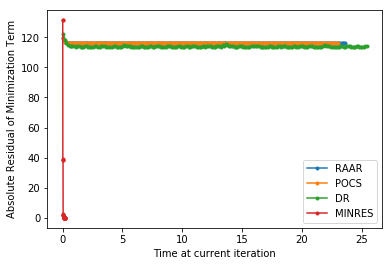

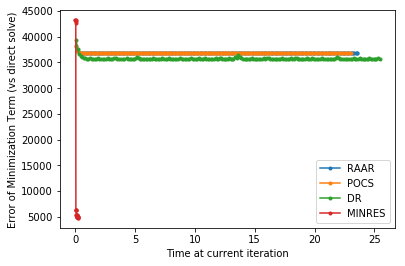

In [9]:
## plotting
def use_loglog(_list_): return _list_[0] >= 100.0*_list_[-1]

## residuals
if use_loglog(raar_mins) or use_loglog(pocs_mins) or use_loglog(dr_mins):
    plt.loglog(raar_times, raar_mins, marker='o', markersize=3)
    plt.loglog(pocs_times, pocs_mins, marker='o', markersize=3)
    plt.loglog(dr_times, dr_mins, marker='o', markersize=3)
    plt.loglog(minres_times, minres_resids, marker='o', markersize=3)
else:
    plt.plot(raar_times, raar_mins, marker='o', markersize=3)
    plt.plot(pocs_times, pocs_mins, marker='o', markersize=3)
    plt.plot(dr_times, dr_mins, marker='o', markersize=3)
    plt.plot(minres_times, minres_resids, marker='o', markersize=3)

plt.xlabel('Time at current iteration')
plt.ylabel('Absolute Residual of Minimization Term')
plt.legend(['RAAR', 'POCS', 'DR', 'MINRES'])
plt.show()

## errors
if use_loglog(raar_mins) or use_loglog(pocs_mins) or use_loglog(dr_mins):
    plt.loglog(raar_times, raar_errs, marker='o', markersize=3)
    plt.loglog(pocs_times, pocs_errs, marker='o', markersize=3)
    plt.loglog(dr_times, dr_errs, marker='o', markersize=3)
    plt.loglog(minres_times, minres_errs, marker='o', markersize=3)
else:
    plt.plot(raar_times, raar_errs, marker='o', markersize=3)
    plt.plot(pocs_times, pocs_errs, marker='o', markersize=3)
    plt.plot(dr_times, dr_errs, marker='o', markersize=3)
    plt.plot(minres_times, minres_errs, marker='o', markersize=3)

plt.xlabel('Time at current iteration')
plt.ylabel('Error of Minimization Term (vs direct solve)')
plt.legend(['RAAR', 'POCS', 'DR', 'MINRES'])
plt.show()